In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X, y = make_blobs(n_samples =  1000, centers = 3, n_features = 2, random_state = 23)

In [3]:
X.shape

(1000, 2)

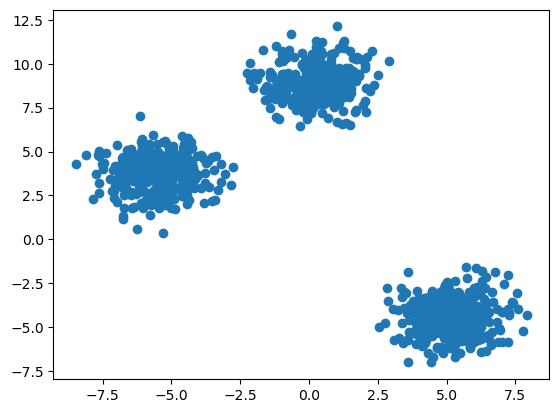

In [4]:
plt.scatter(X[:,0],X[:,1])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state = 42)

In [7]:
from sklearn.cluster import KMeans

In [8]:
## Manual Process
## Elbow Method to select the K value

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\Users\absol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\absol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\absol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\absol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [9]:
wcss

[34827.57682552022,
 7935.4372861454185,
 1319.2730531585607,
 1140.4677884655127,
 992.5462587554143,
 853.2558345247517,
 764.4255279450451,
 665.7041887541743,
 582.9341183161889,
 534.0279553922342]

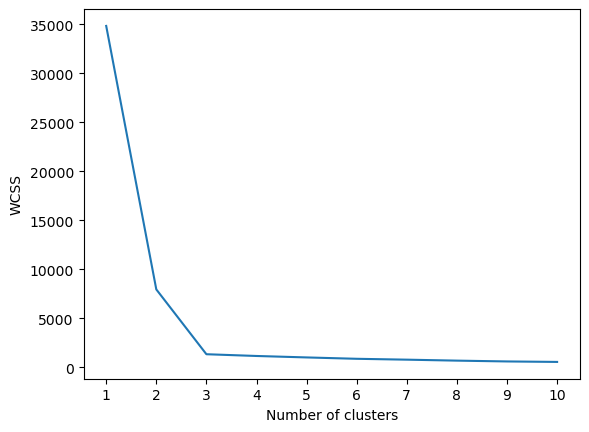

In [10]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 3, init = "k-means++")

In [12]:
y_labels = kmeans.fit_predict(X_train)

C:\Users\absol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\absol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


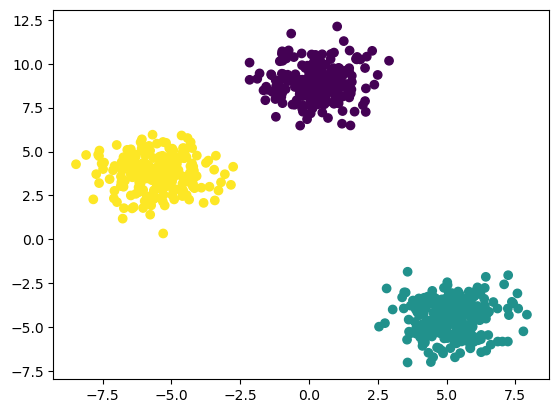

In [13]:
plt.scatter(X_train[:,0],X_train[:,1], c=y_labels)

In [14]:
y_test_labels = kmeans.predict(X_test)

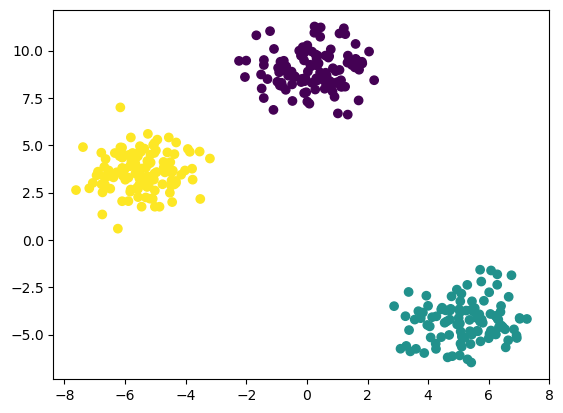

In [15]:
plt.scatter(X_test[:,0],X_test[:,1], c=y_test_labels)

In [16]:
## Knee locator

In [17]:
!pip install kneed

In [18]:
from kneed import KneeLocator

In [19]:
kl = KneeLocator(range(1,11),wcss,curve = 'convex', direction='decreasing')
kl.elbow

3

In [20]:
## Performance metrics
## Silhoutte score
from sklearn.metrics import silhouette_score

In [21]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init = 'k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\absol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\absol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\absol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\absol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [22]:
silhouette_coefficients 

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.48113741589905623,
 0.3338378048657467,
 0.33821741078503126,
 0.3349775029358679,
 0.34279995380822215,
 0.34262383445217565]

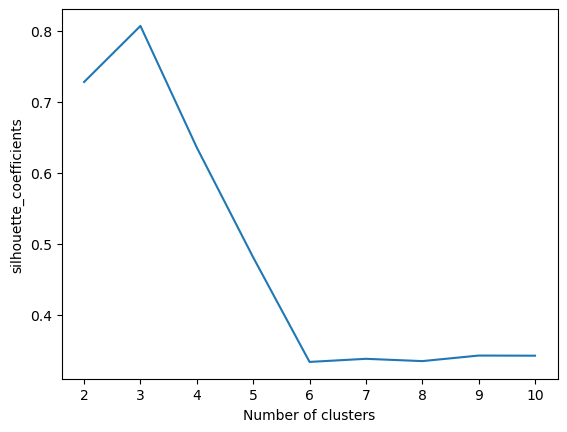

In [23]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients )
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("silhouette_coefficients")
plt.show()